In [1]:
from textwrap import wrap
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
import os

In [2]:
IMG_FOLDER = 'images_MHL/'

In [3]:
data = pd.read_excel('data_MHL.xlsx')

In [4]:
data.info()
KEY_RUE = 'Rue'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62498 entries, 0 to 62497
Data columns (total 52 columns):
Unnamed: 0                                                            62498 non-null int64
Date de fabrication :                                                 34597 non-null object
Date de référence :                                                   185 non-null object
Début fabrication:                                                    26192 non-null object
Fin fabrication:                                                      26140 non-null object
Remarques sur les dates de fabrication (y compris début et fin) :     445 non-null object
Geo - Localité 1 :                                                    32837 non-null object
Geo - NPA 1 :                                                         22819 non-null object
Geo - No Rue 1 :                                                      2962 non-null object
Geo - Pays 1 :                                                       

In [5]:
pd.set_option('display.max_columns', None)
data.head()

,Unnamed: 0,Date de fabrication :,Date de référence :,Début fabrication:,Fin fabrication:,Remarques sur les dates de fabrication (y compris début et fin) :,Geo - Localité 1 :,Geo - NPA 1 :,Geo - No Rue 1 :,Geo - Pays 1 :,Geo - Rue 1 :,Domaine :,Fonction :,Titre donné par l'artiste :,Objet en question :,Objet/sujet localisé 1 :,Partie du corps :,Pers. représentée:,Genre :,Type de portrait :,Description :,Mots-clés principaux :,Mots-clés secondaires :,Document annexe :,Inscriptions faites par l'auteur :,Inscriptions et marques diverses :,Remarques historiques :,Auteur créateur :,Auteur de l'objet représenté :,Auteur technique :,Photographe :,Signature / marque :,"Entité (personne, société, ...) en rapport avec l'objet :",Editeur :,Technique générale 1 :,Technique générale 2 :,Technique précise :,Remarques techniques :,Dimensions de l'objet - cm :,Dimensions du montage [cm] :,Montage :,Institution :,Fichier :,Bibliographie :,Total des objets concernés :,Remarques diverses :,Cote :,Numéro d'entrée :,Numéro d'exemplaire :,Image:,image_url,id
0,0,NaN,NaN,"1891 (1891, construction du bâtiment)",1910,NaN,Lausanne,NaN,NaN,Suisse,NaN,"objet bidimensionnel, photographie",NaN,Ecole des Plaines du Loup (verso-centre-droite),NaN,NaN,NaN,NaN,NaN,NaN,"On distingue une route en terre avec, à droite...","Lausanne, Blécherette, route de Romanel, avenu...","école des Plaines-du-Loup, route, poteau élect...",NaN,NaN,NaN,"bâtiment construit en 1891, architecte Henri G...",anonyme,NaN,NaN,Pittet Sylviane,NaN,NaN,NaN,photographie,positif noir-blanc,collodion,NaN,"5.7 x 8.4 (ex. b), 6.1 x 9 (ex. a)",NaN,NaN,Musée Historique Lausanne,"P.1.A, fonds topographie lausannoise",NaN,NaN,NaN,P.1.A.1.R.27.001,NaN,NaN,C_MHL96795; haute définition (1).,http://museris.lausanne.ch/SGCM/GetImage.ashx?...,96795
1,1,NaN,NaN,1960 (datation selon l'habillement des personn...,1975,NaN,Lausanne,NaN,NaN,Suisse,NaN,"objet bidimensionnel, photographie",NaN,Blécherette (verso-bas-centre),NaN,NaN,NaN,NaN,NaN,NaN,"Au premier plan, on voit le sol en béton et de...","Lausanne, Blécherette, aéroport de la Blécherette","Plaines-du-Loup, aérodrome, inauguration, hang...",NaN,NaN,Inaug. du hangar construit pr la Confédération...,NaN,anonyme,NaN,NaN,NaN,NaN,NaN,NaN,photographie,positif noir-blanc,tirage moderne,NaN,18.2 x 24,NaN,NaN,Musée Historique Lausanne,"P.1.A, fonds topographie lausannoise",NaN,NaN,NaN,P.1.A.1.B.40.004,NaN,NaN,C_MHL96796; haute définition (1).,http://museris.lausanne.ch/SGCM/GetImage.ashx?...,96796
2,2,NaN,NaN,1950 (datation d'après l'habillement),1960,NaN,Lausanne,NaN,NaN,Suisse,Rte de la Blécherette,"objet bidimensionnel, photographie",NaN,Blécherette (verso-bas-centre),NaN,NaN,NaN,NaN,NaN,NaN,"Au premier plan, on trouve trois rangées de pe...","Lausanne, Blécherette, aéroport de la Blécherette","Plaines-du-Loup, aérodrome, hangar, rassemblem...",NaN,NaN,tout à droite M. Kammacher (verso-centre-centre),NaN,Würgler Albert,NaN,NaN,NaN,"A. Würgler, Lausanne (timbre sec, recto-bas-dr...",NaN,NaN,photographie,positif noir-blanc,tirage moderne,NaN,16.2 x 22.3,NaN,NaN,Musée Historique Lausanne,"P.1.A, fonds topographie lausannoise",NaN,NaN,NaN,P.1.A.1.B.40.002,NaN,NaN,C_MHL96797; haute définition (1).,http://museris.lausanne.ch/SGCM/GetImage.ashx?...,96797
3,3,NaN,NaN,1965,1975,NaN,Lausanne,NaN,NaN,Suisse,Rte de la Blécherette,"objet bidimensionnel, photographie",NaN,Blécherette (verso-haut-centre),NaN,NaN,NaN,NaN,NaN,NaN,"à l'arrière-plan, se trouve l'aérodrome de la ...","Lausanne, Blécherette, aéroport de la Blécherette","Plaines-du-Loup, aérodrome, service des automo...",NaN,NaN,NaN,NaN,Würgler prénom indéterminé,NaN,NaN,NaN,Würgler (verso-centre-centre),NaN,NaN,photographie,positif noir-blanc,tirage moderne,NaN,6.7 x 9.9,NaN,NaN,Musée Historique Lausanne,"P.1.A, fonds topographie lausannoise",NaN,NaN,NaN,P.1.A.1.B.40.005,NaN,NaN,C_MHL96798; haute définition (1).,http://museris.lausanne.ch/SGCM/GetImage.ashx?...,96798
4,4,30/01/1923,NaN,NaN,NaN,NaN,Lausanne,NaN,N

In [309]:

data['Rue'] = data['Geo - Rue 1 : '] + ' ' + data['Geo - No Rue 1 : '].fillna('')

In [310]:
data.groupby('Geo - Rue 1 : ').count().head()

,Unnamed: 0,Date de fabrication :,Date de référence :,Début fabrication:,Fin fabrication:,Remarques sur les dates de fabrication (y compris début et fin) :,Geo - Localité 1 :,Geo - NPA 1 :,Geo - No Rue 1 :,Geo - Pays 1 :,Domaine :,Fonction :,Titre donné par l'artiste :,Objet en question :,Objet/sujet localisé 1 :,Partie du corps :,Pers. représentée:,Genre :,Type de portrait :,Description :,Mots-clés principaux :,Mots-clés secondaires :,Document annexe :,Inscriptions faites par l'auteur :,Inscriptions et marques diverses :,Remarques historiques :,Auteur créateur :,Auteur de l'objet représenté :,Auteur technique :,Photographe :,Signature / marque :,"Entité (personne, société, ...) en rapport avec l'objet :",Editeur :,Technique générale 1 :,Technique générale 2 :,Technique précise :,Remarques techniques :,Dimensions de l'objet - cm :,Dimensions du montage [cm] :,Montage :,Institution :,Fichier :,Bibliographie :,Total des objets concernés :,Remarques diverses :,Cote :,Numéro d'entrée :,Numéro d'exemplaire :,Image:,image_url,id,Rue,tags
Geo - Rue 1 :,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ch. de Champrilly,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,1,1,1,1
Rue de la Pontaise,2,2,0,0,0,0,2,2,2,2,2,0,0,0,2,0,0,0,0,2,2,0,0,0,2,0,2,0,0,0,2,0,0,2,2,0,0,2,0,0,2,2,0,0,2,2,0,0,2,2,2,2,2
"20,22,24",1,1,0,0,0,0,1,1,0,1,1,0,0,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,1,1,1,1
Allée Ernest-Ansermet,18,18,0,0,0,0,18,18,8,18,18,0,0,0,18,0,0,0,0,18,18,18,0,3,14,0,18,0,0,0,17,0,0,18,18,0,0,17,0,0,18,18,1,0,18,18,0,0,17,17,18,18,18
Allée Ernest-Ansermet,1,1,0,0,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,1,1,1,1


In [311]:
pd.set_option('display.max_rows', None)
sorted_streets = data[KEY_RUE].value_counts(dropna=False)

In [312]:
sorted_streets

NaN                                                                       39978
Pl. Saint-François                                                         1009
Av. d'Ouchy                                                                 958
Pl. Centrale                                                                753
Pl. de la Riponne                                                           585
Pl. de la Cathédrale                                                        569
Pl. du Port                                                                 563
Av. Benjamin-Constant                                                       538
Av. de Beaulieu                                                             479
Pl. de la Palud                                                             448
Pl. Chauderon                                                               365
Av. de la Gare                                                              322
Esc. du Grand-Pont                      

In [65]:
def plot_batch(items):
    valid_pictures = []
    for _, row in items.iterrows():
        filename = f'{IMG_FOLDER}{row["id"]}.jpg'
        
        valid_pictures.append(os.path.exists(filename))
    filtered_items = items[valid_pictures]        
    fig, axs = plt.subplots(max(math.ceil(filtered_items.shape[0] / 4), 2), 4, figsize=(32,32))
    fig.tight_layout()
    idx = 0
    for _, row in filtered_items.iterrows():
        try:
            print(filename)
            #print(row['id'])
            filename = f'{IMG_FOLDER}{row["id"]}.jpg'
            #print(filename)
            #print(idx // 4, idx % 4)
            image = mpimg.imread(filename)
            axs[math.floor(idx / 4), idx % 4].set_xlabel(wrap(filename + '\n' + str(row['Mots-clés principaux : '])))
            axs[math.floor(idx / 4), idx % 4].imshow(image)
            idx += 1
        except Exception as e:
            print(f'Could not find {filename}')

images_MHL/170712.jpg
images_MHL/170710.jpg
images_MHL/170711.jpg


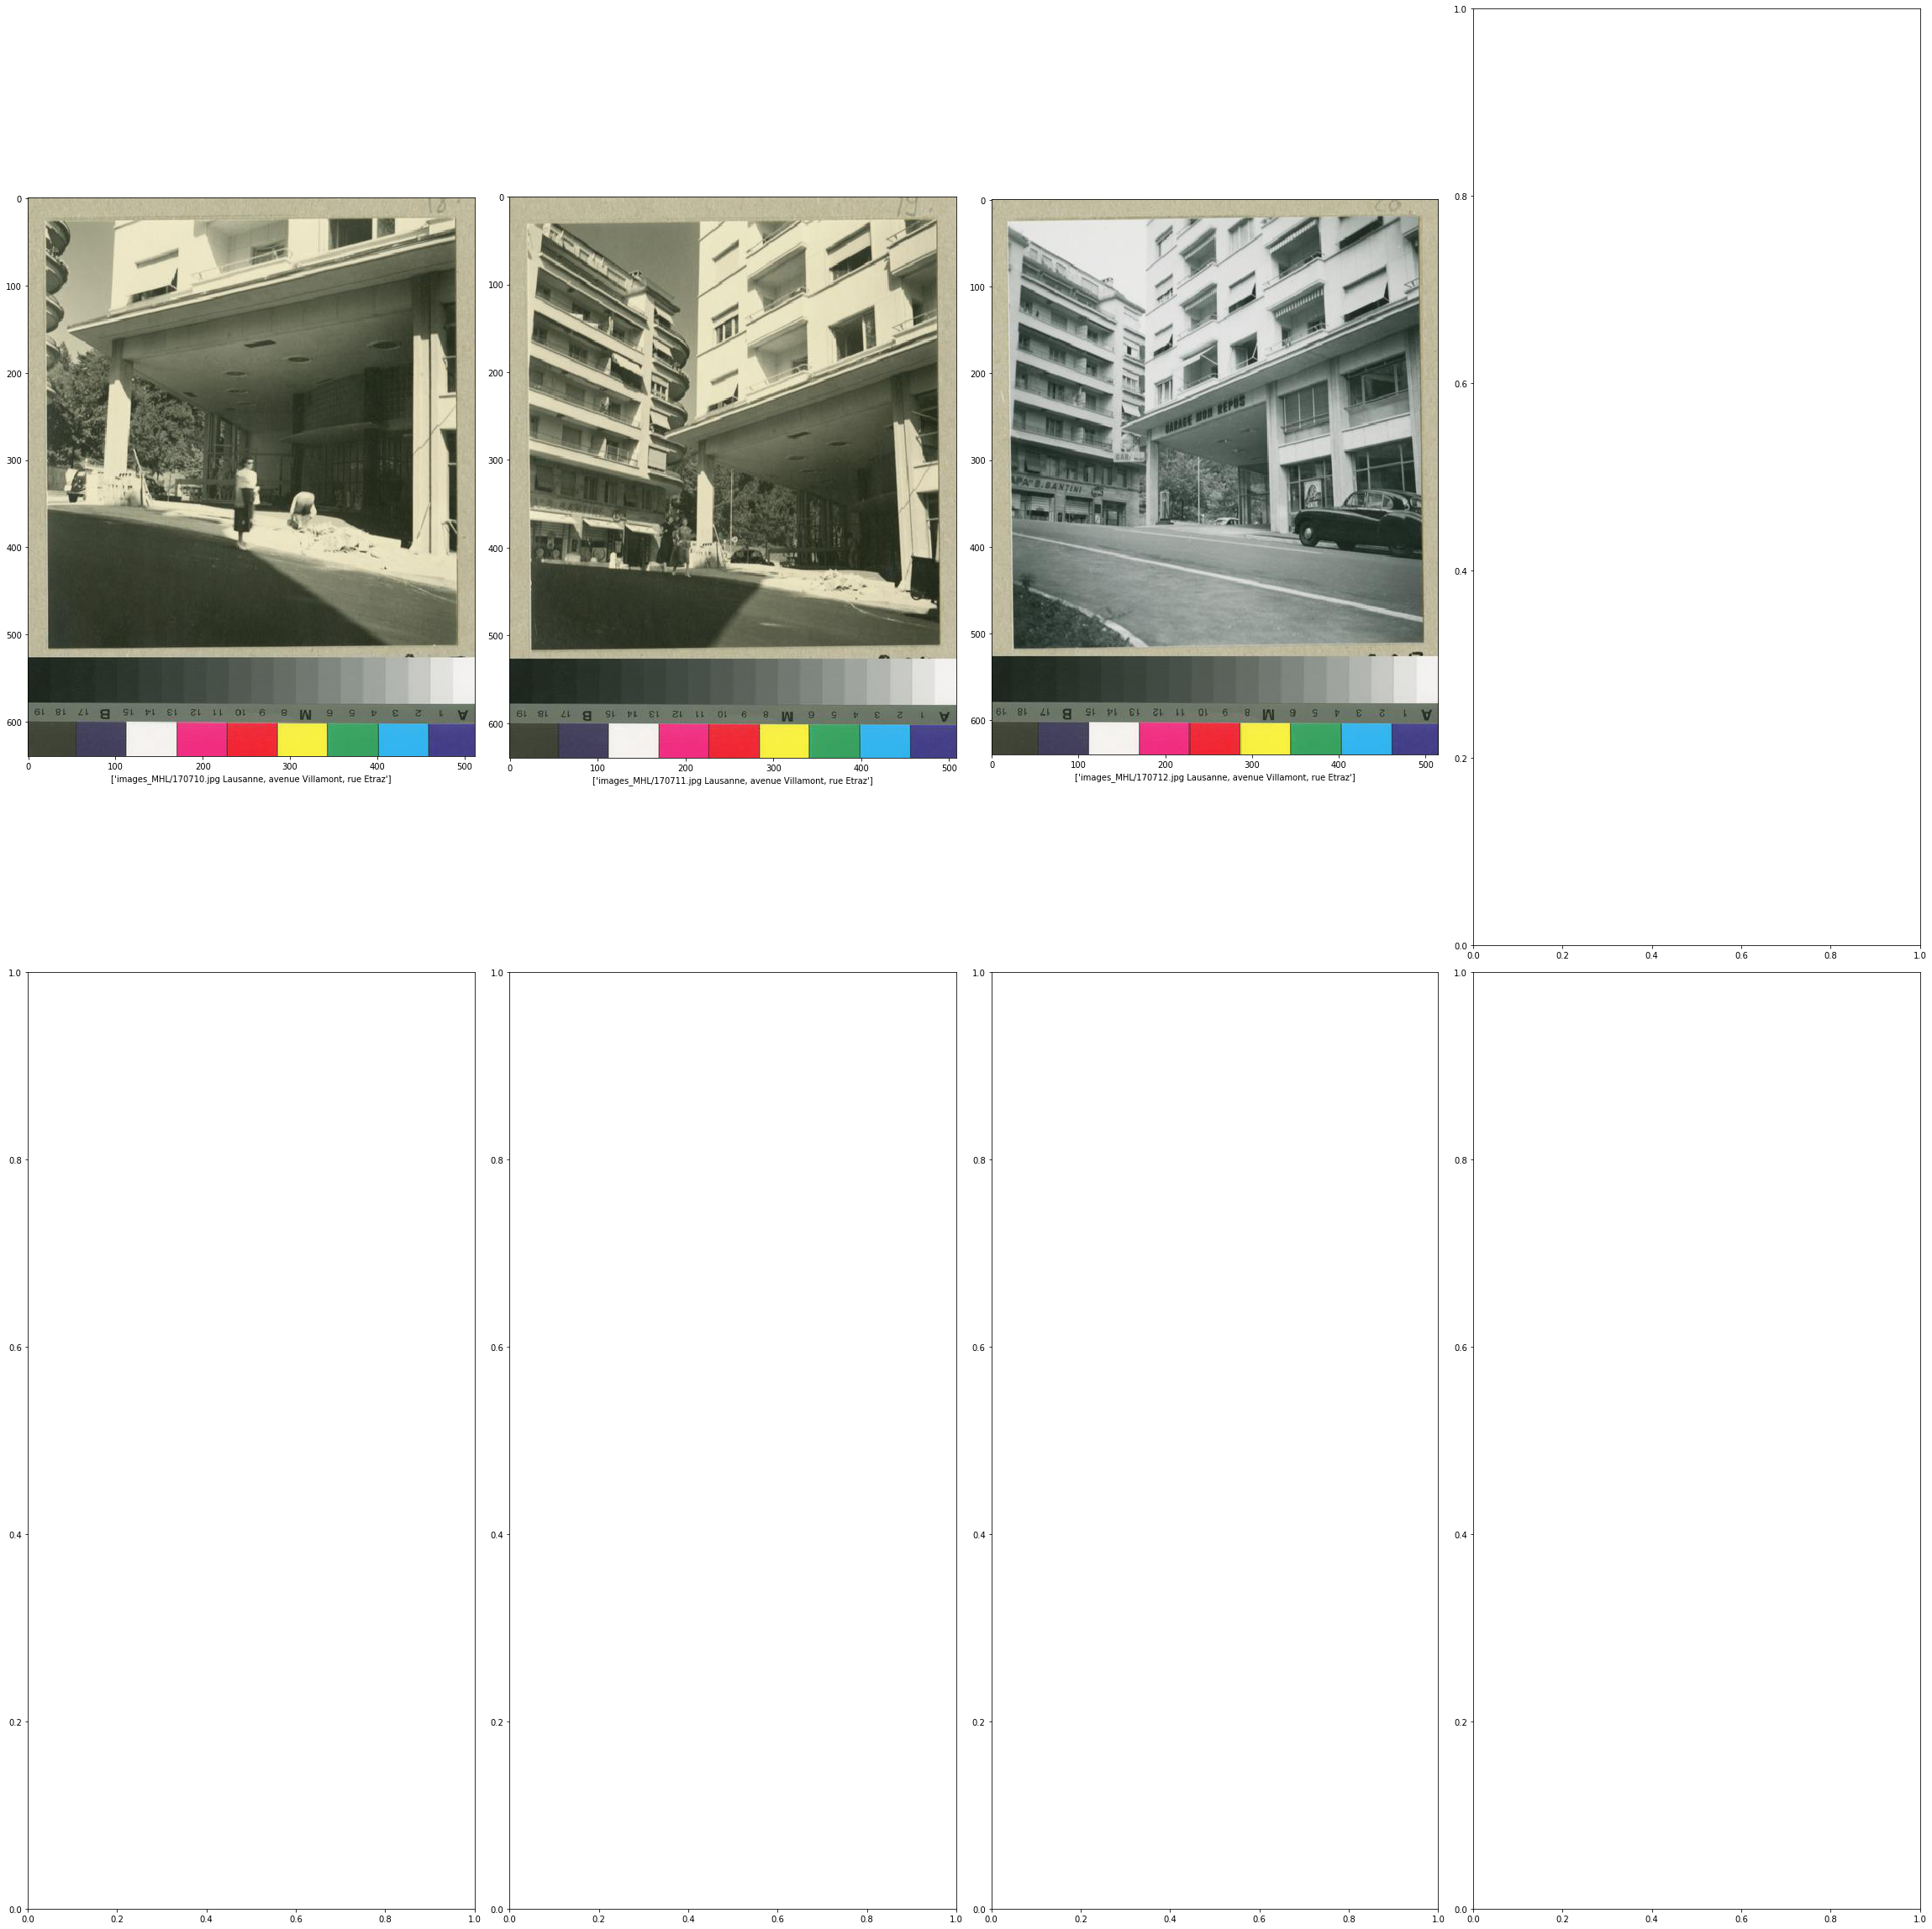

In [66]:
items = data[data[KEY_RUE]=='Av. Villamont 1']
plot_batch(items)

In [31]:
data['tags'] = data['Mots-clés principaux : '].str.lower()
data['tags'] = data['tags'].str.split(',')


In [32]:
def get_tags_dict(data):
    tags_dict = {}
    tags_list = data['tags'].dropna().map(lambda l: list(map(str.strip, l))).tolist()
    tag_counter = 0
    for tags in tags_list:
        for tag in tags:
            tags_dict[tag] = tag_counter
            tag_counter += 1
    print(tag_counter)
    return tags_dict


In [33]:
tags_dict = get_tags_dict(data)
len(tags_dict)

274145


20439

In [34]:
def sim_matrix(data):
    similarity_matrix = np.zeros(shape=(len(data), len(data)))
    for idx1, (_, row1) in enumerate(data.iterrows()):
        for idx2, (_, row2) in enumerate(data.iterrows()):
                set1 = set(row1['tags'])
                set2 = set(row2['tags'])
                similarity_matrix[idx1, idx2] = len(set1.intersection(set2)) / len(set1.union(set2))
    return similarity_matrix

In [36]:
def plot_distances(data, group_name=""):
    similarity_matrix = sim_matrix(data)
    fig, ax = plt.subplots(figsize=(20,20))
    cax = ax.matshow(similarity_matrix, interpolation='nearest')
    ax.grid(True)
    plt.xticks(range(len(data)), data['id'], rotation=90);
    plt.yticks(range(len(data)), data['id']);
    fig.colorbar(cax, ticks=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, .75,.8,.85,.90,.95,1])
    plt.title(f'Similarity matrix {group_name}')
    plt.show()

Pl. de la Cathédrale 4


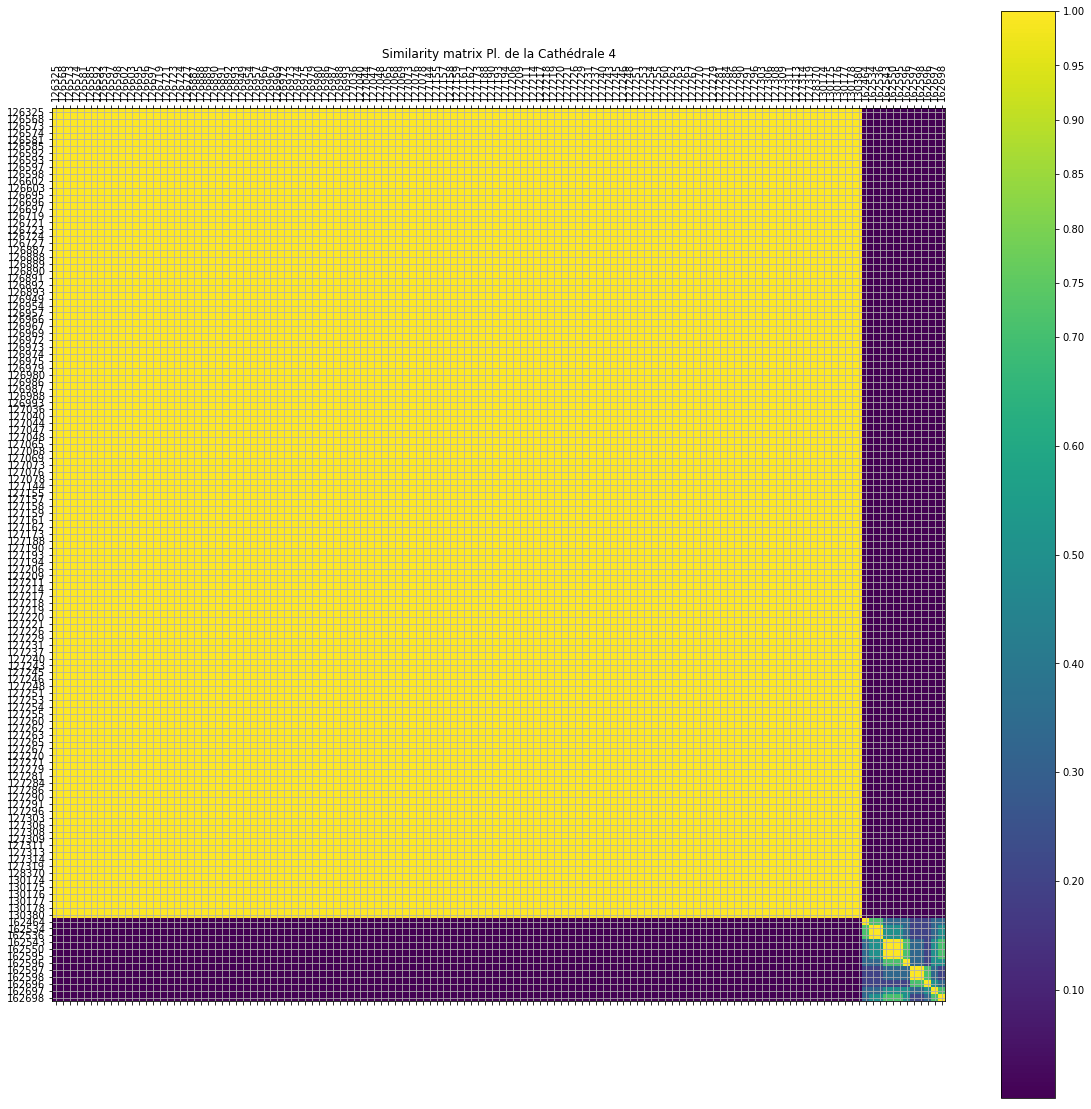

Rue Centrale 28


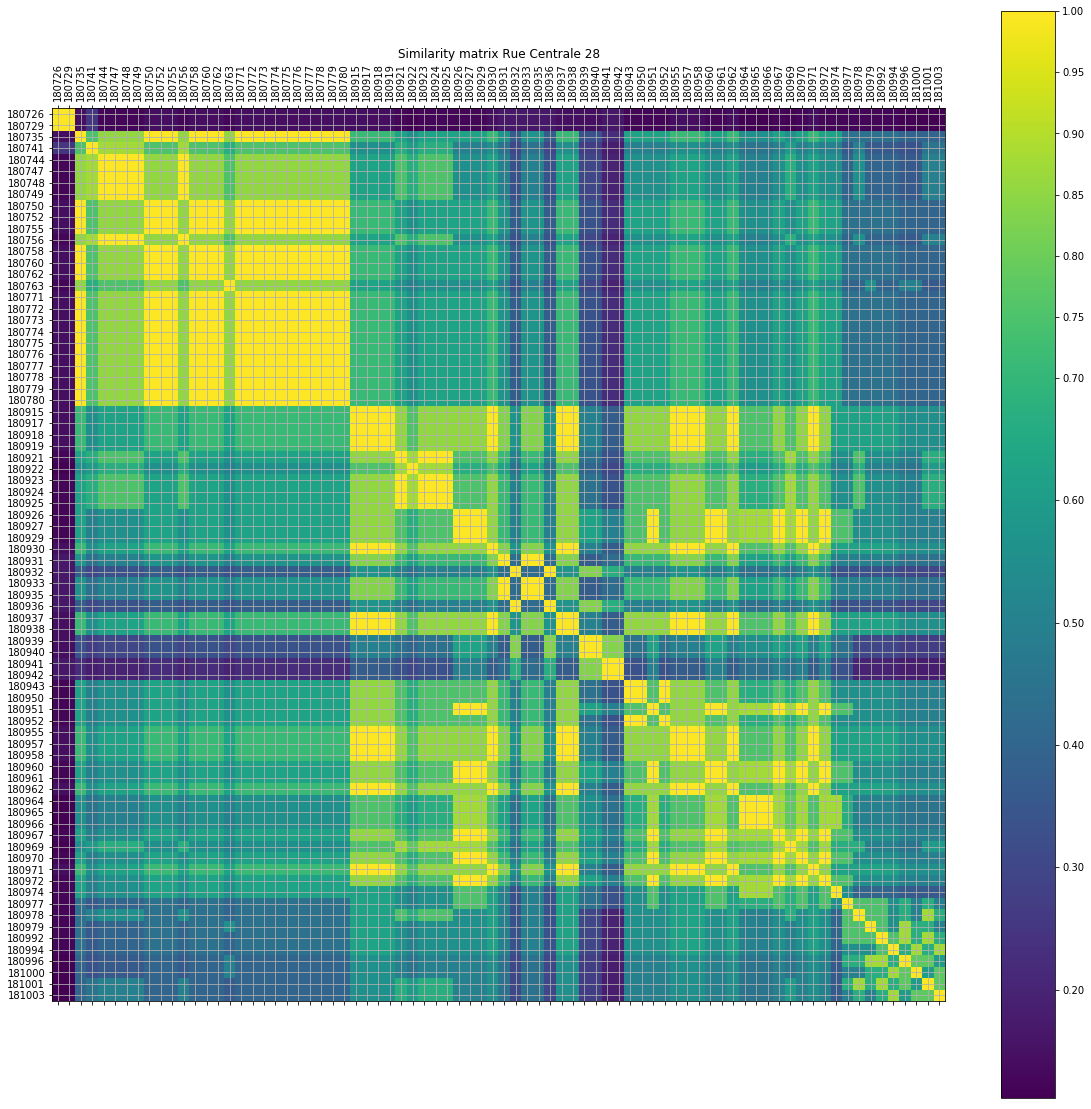

Rte des Plaines-du-Loup 4a


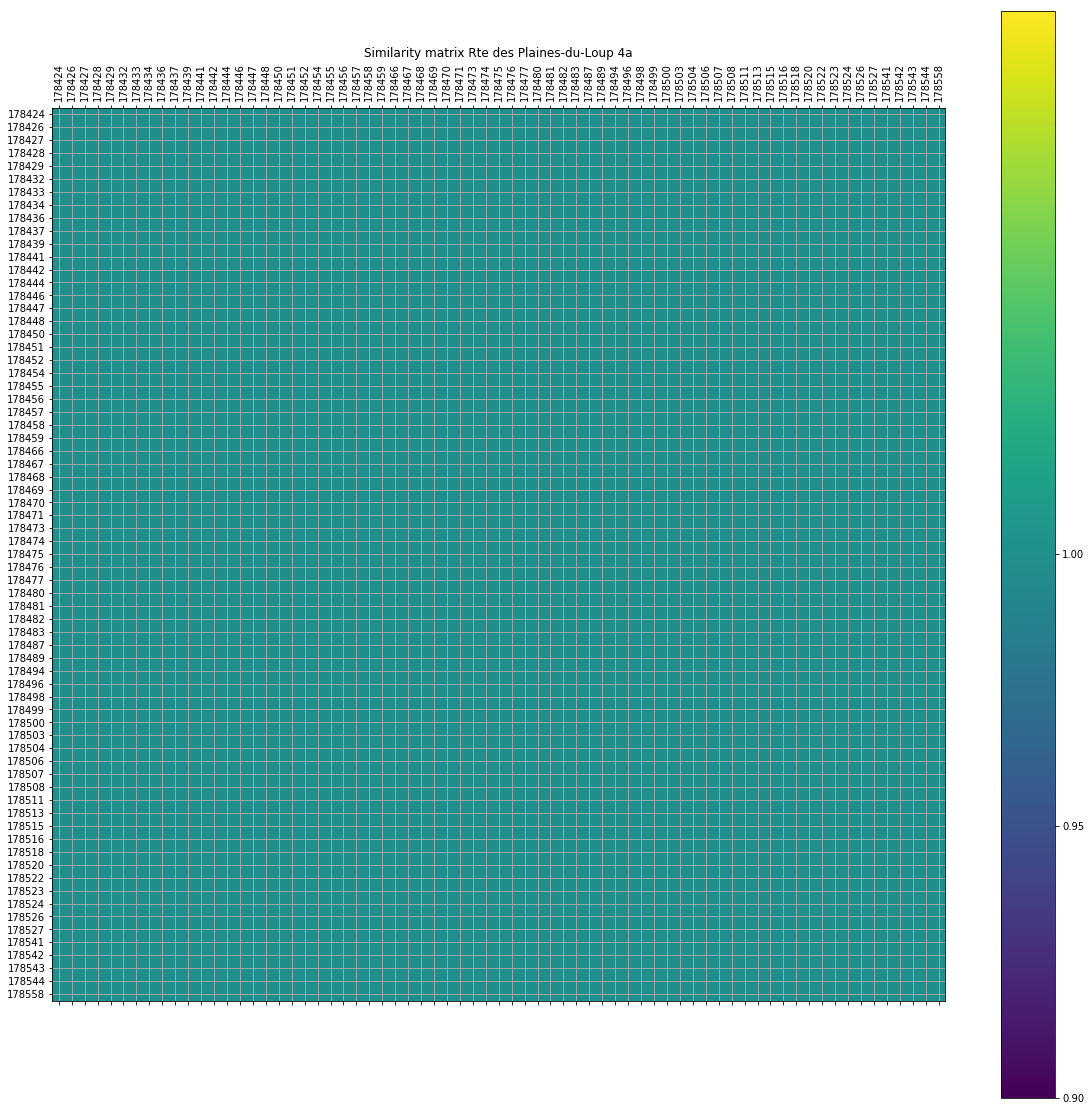

Pl. de la Gare 4


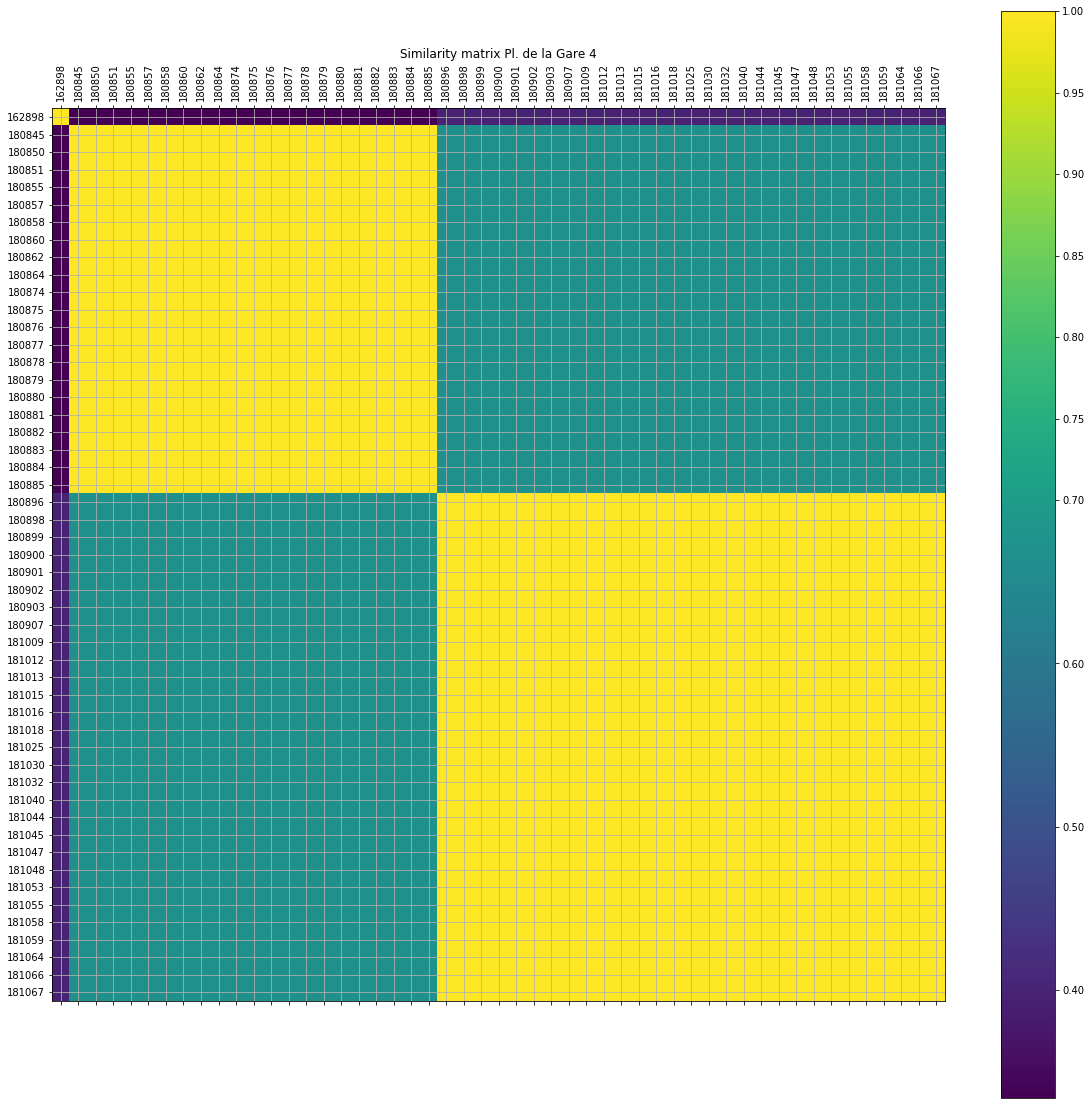

Rue des Terreaux 14


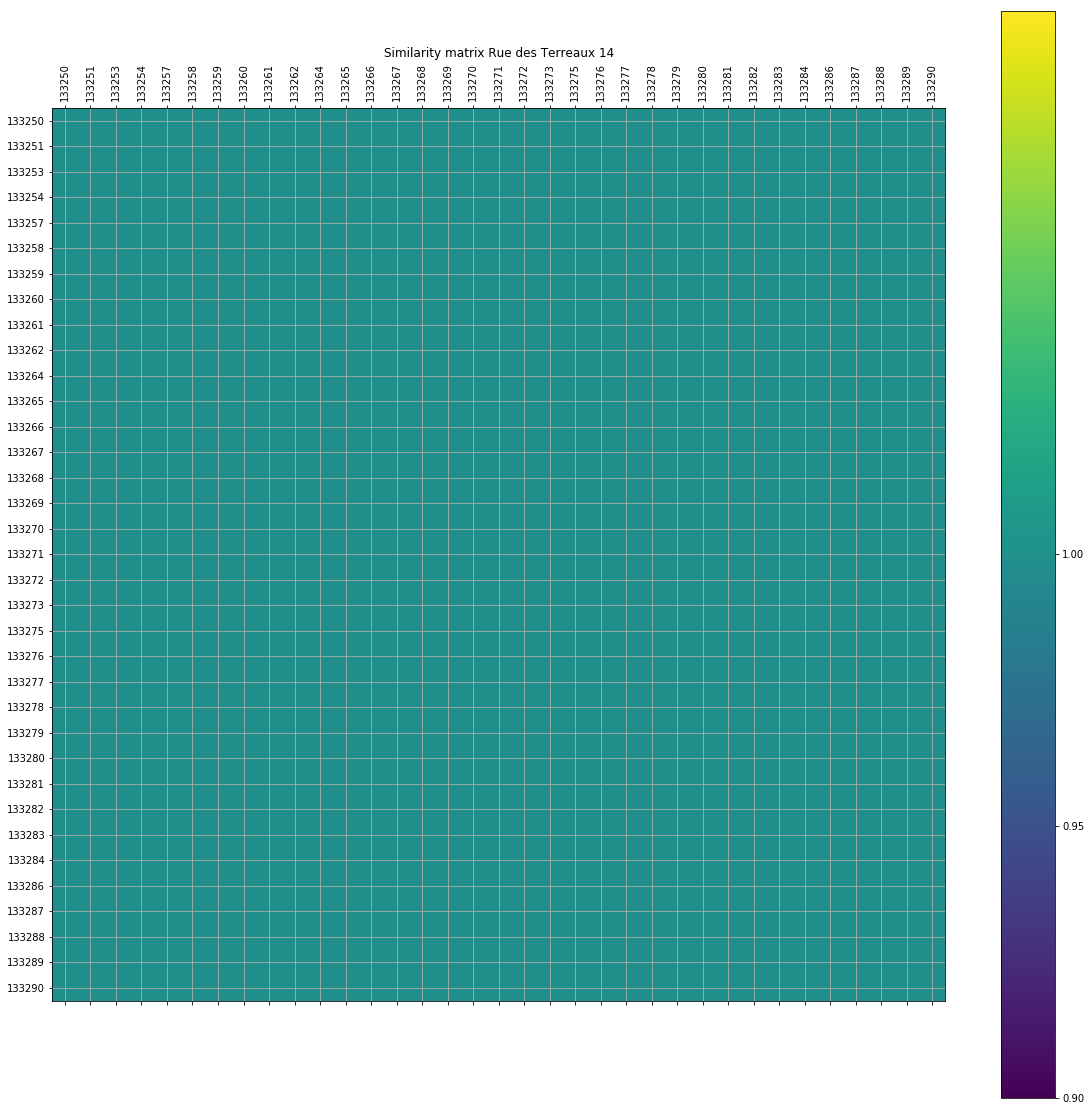

Av. de Béthusy 6


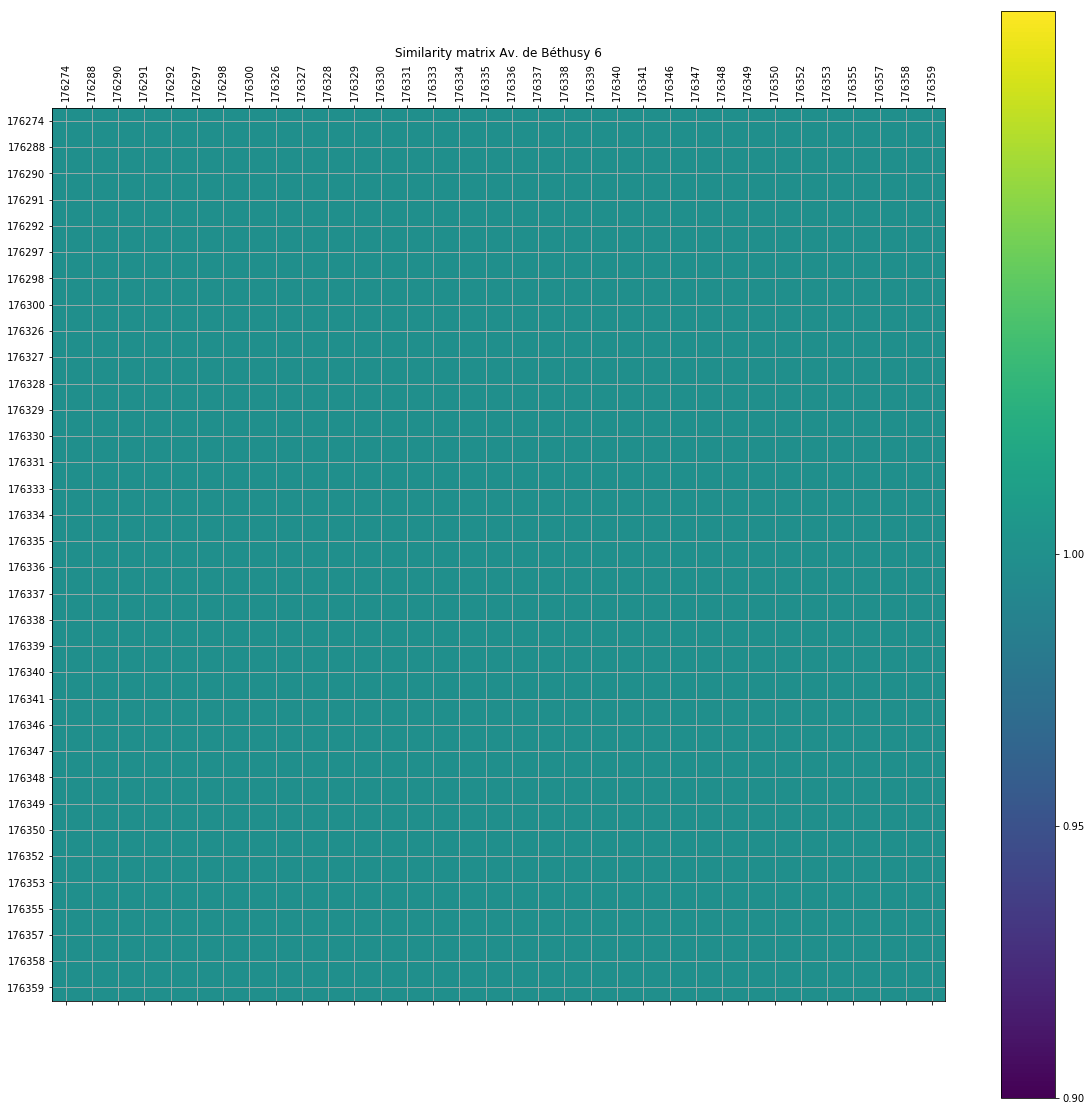

Pl. de la Riponne 10


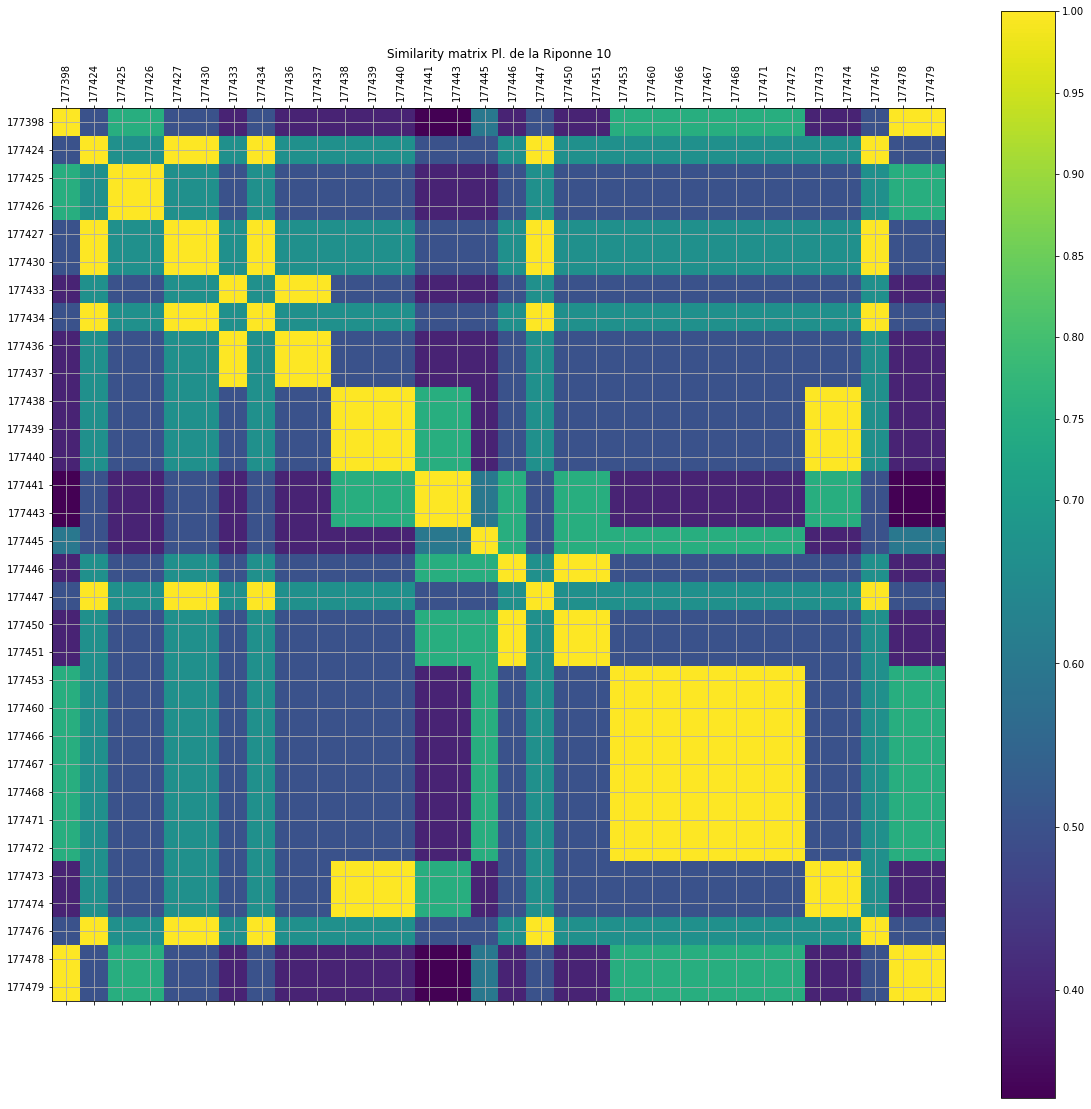

Rue du Bugnon 21


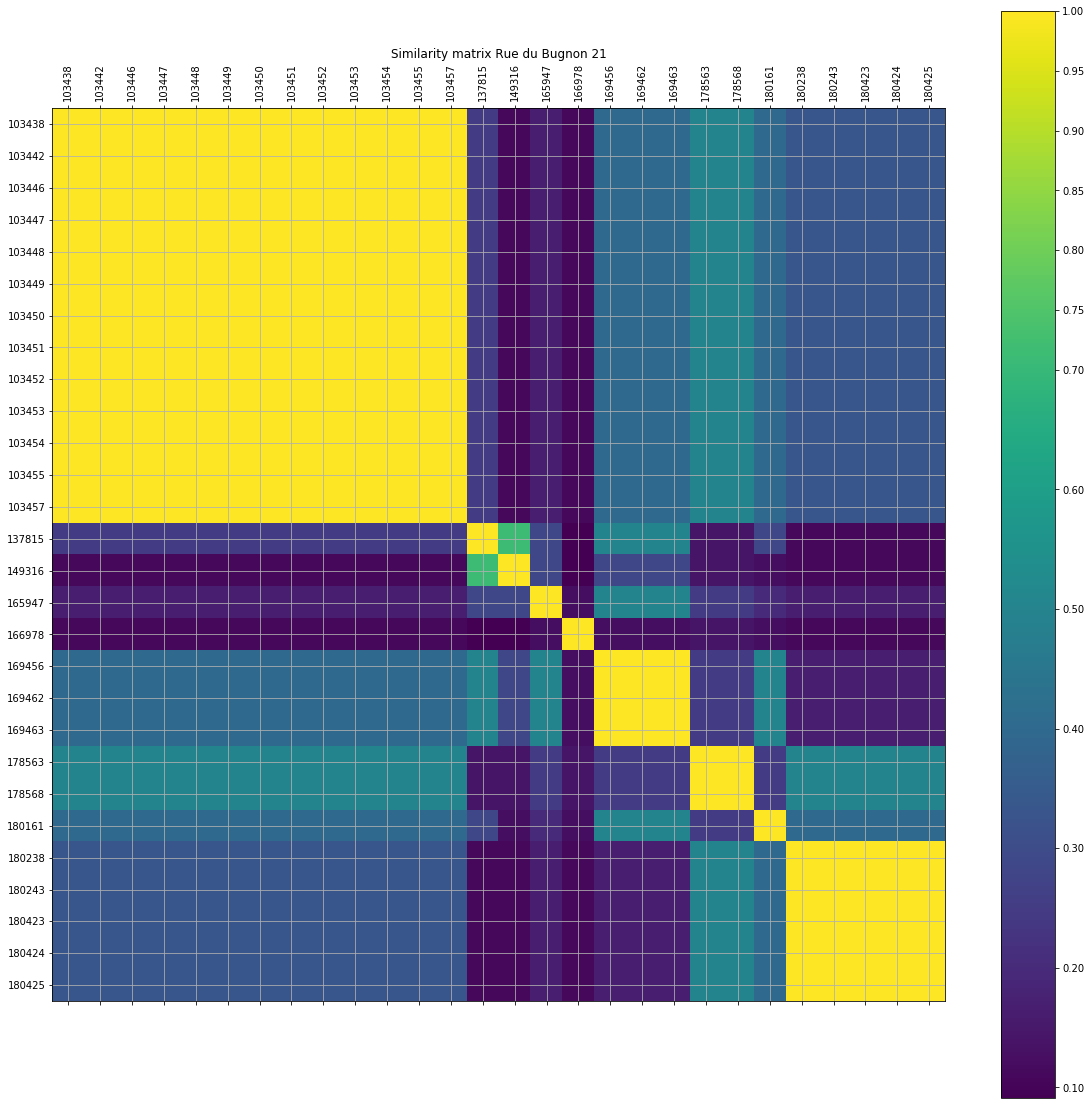

Av. de Cour 41


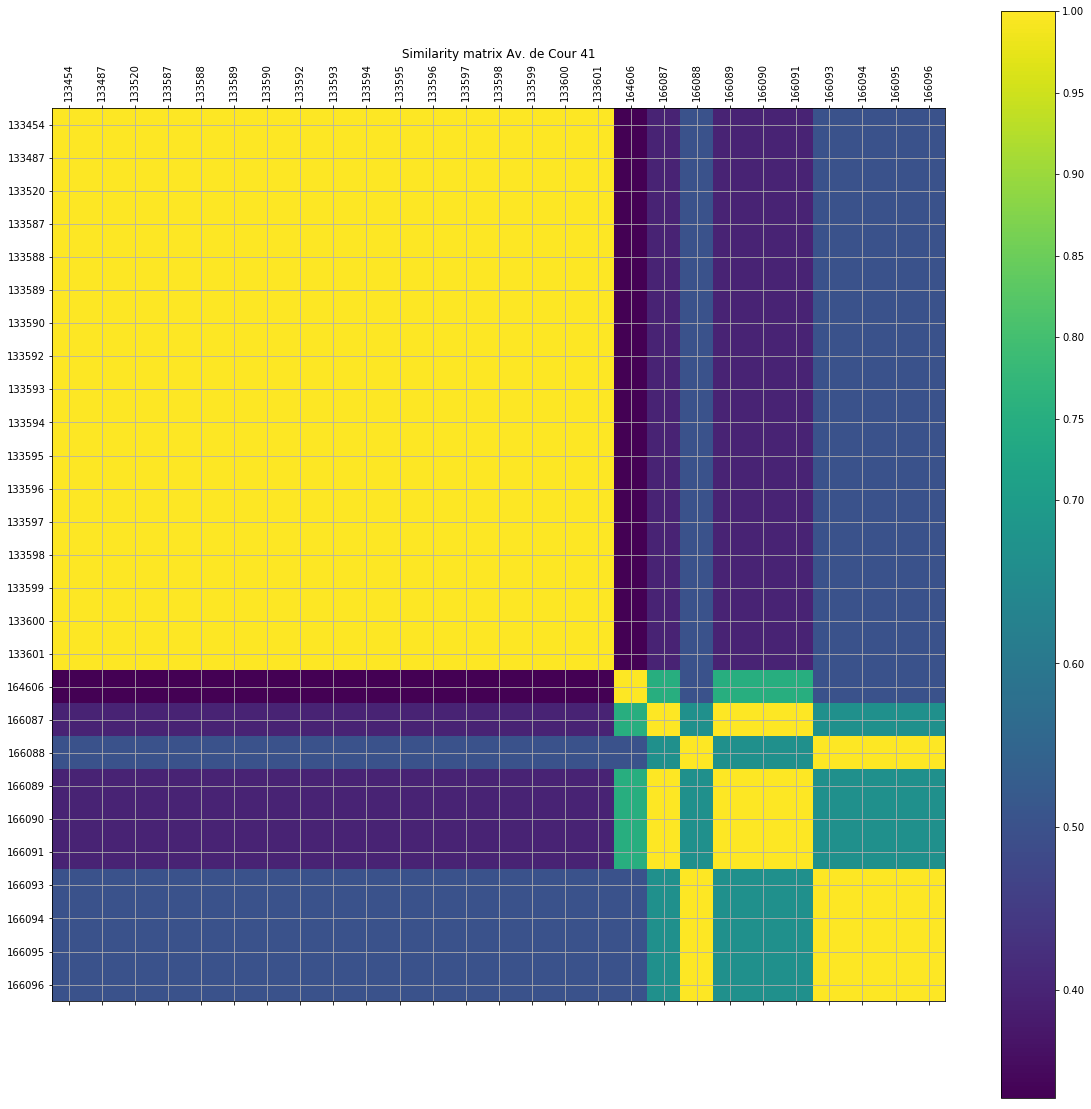

In [75]:
for street in sorted_streets[1:10].keys():
    print(street)
    plot_distances(data[data[KEY_RUE]==street], street)

In [313]:
type(sorted_streets[:10])
sorted_streets.dropna()[1:10]

Pl. Saint-François        1009
Av. d'Ouchy                958
Pl. Centrale               753
Pl. de la Riponne          585
Pl. de la Cathédrale       569
Pl. du Port                563
Av. Benjamin-Constant      538
Av. de Beaulieu            479
Pl. de la Palud            448
Name: Rue, dtype: int64

In [315]:
def find_clusters(data):
    similarity_matrix = sim_matrix(data)
    return AgglomerativeClustering().fit_predict(similarity_matrix)

In [ ]:
street = 'Ch. de Montelly'

In [229]:
clusters = find_clusters(data[data[KEY_RUE]==street])

In [230]:
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
      dtype=int64)

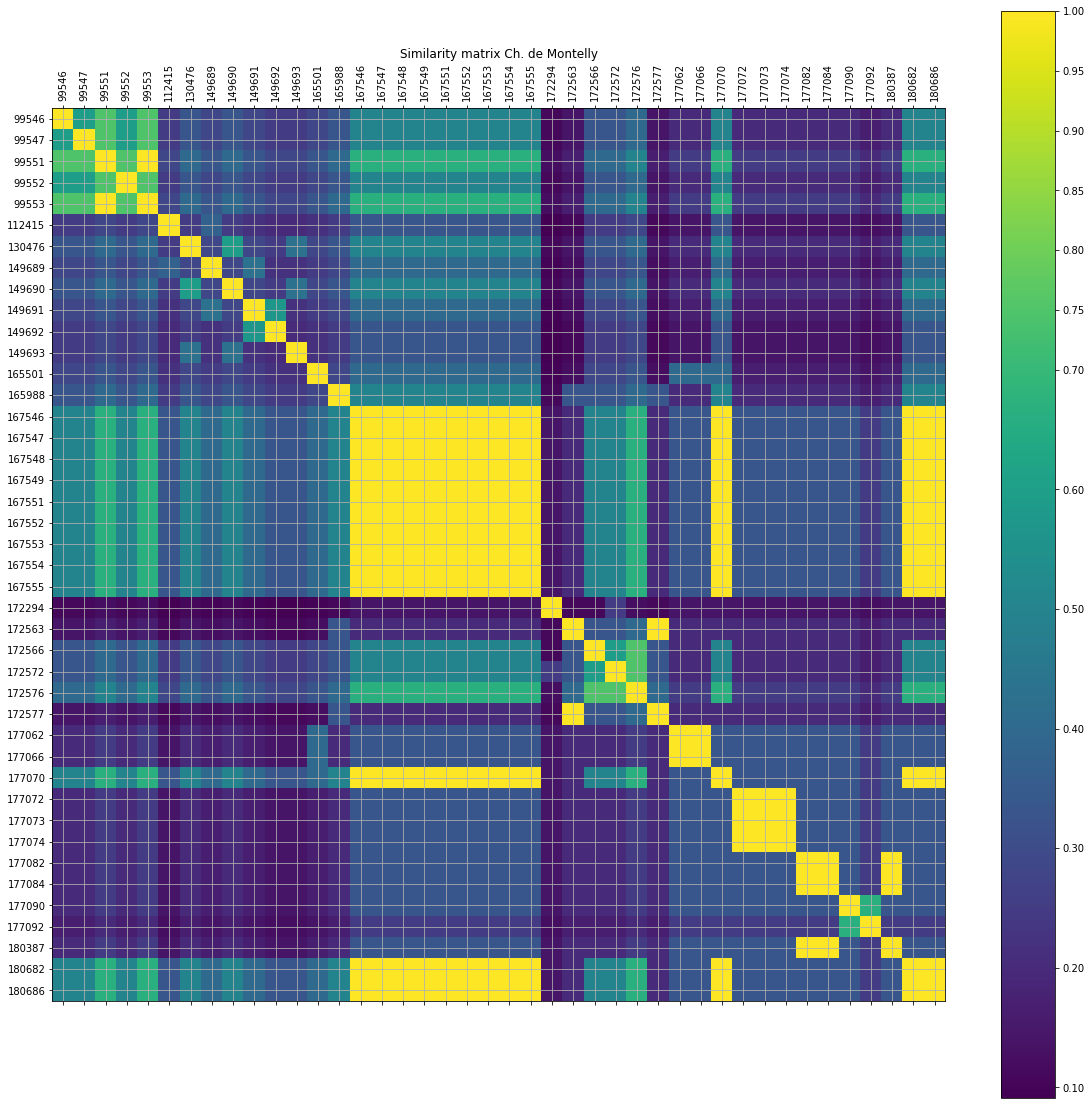

In [233]:
plot_distances(data[data[KEY_RUE]==street], street)

In [318]:
import networkx as nx
def find_clusters_from_data(data, street):
    find_clusters_from_matrix(sim_matrix(data[data[KEY_RUE]==street]), street, data.loc[data[KEY_RUE]==street, 'id'].tolist())

def find_clusters_from_matrix(matrix, street="", img_ids=[]):
    plt.figure(figsize=(18,18))
    G = nx.Graph(title=street)
    G.add_edges_from(np.unique(np.argwhere(matrix == 1.0), axis=0).tolist(), physics=False)

    G2 =nx.Graph(title=street)
    nt = Network(width="100%", height="1000px")
    
    for group, connected_component in enumerate(nx.connected_components(G)):
        for id in connected_component:
            filename = f'images_MHL/{img_ids[id]}.jpg'
            nt.add_node(id, label=str(img_ids[id]), group=group, shape='image', image=filename, title=data.loc[data['id']==img_ids[id], ["tags"]].T.to_string())
    #nt.title(street)
    nt.add_edges(np.unique(np.argwhere(matrix == 1.0), axis=0).tolist())
    nt.barnes_hut()
    nt.show(f"{'_'.join(street.split())}.html")



In [322]:
#sim_matrix(data[data[KEY_RUE]=='Av. d\'Ouchy '])

In [329]:
from sklearn.metrics import jaccard_score
jaccard_score([[0,1]], [[0,2]])

ValueError: Target is multilabel-indicator but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted', 'samples'].

In [319]:
for street in sorted_streets[1:20].keys():
    find_clusters_from_data(data[data[KEY_RUE]==street], street)


{0}
{1, 9}
{2}
{3}
{176, 4}
{5}
{8, 6}
{7}
{10}
{11}
{12, 13, 14, 15}
{16}
{17}
{18}
{19}
{20}
{21}
{22}
{24, 25, 23}
{26}
{27}
{28, 29}
{30}
{31}
{32}
{33}
{34}
{35}
{36}
{37}
{38}
{40, 49, 145, 39}
{41}
{42}
{43}
{44}
{45}
{46}
{47}
{48}
{50}
{51}
{52}
{53}
{54}
{55}
{56}
{57}
{58}
{59, 60, 61}
{62}
{63}
{64}
{65}
{66}
{67}
{68, 69, 70}
{71}
{72}
{73}
{74}
{75}
{76, 77}
{78}
{80, 79}
{81}
{82}
{83, 85}
{84}
{86}
{87}
{94, 88, 89, 90, 91, 92, 93, 670, 95}
{96}
{97, 98}
{99}
{100}
{101}
{102}
{103}
{104}
{105, 106}
{107}
{108}
{109}
{110}
{111}
{112}
{113}
{114}
{115}
{116}
{117}
{118}
{119}
{928, 929, 930, 120, 927}
{121}
{122}
{186, 123, 124}
{128, 129, 125, 126, 127}
{130}
{131}
{132}
{133}
{134}
{136, 138, 139, 135}
{137, 141}
{140}
{483, 484, 485, 142}
{143}
{144}
{146}
{147}
{148, 149}
{150}
{151}
{152, 155, 156}
{153}
{154}
{157, 158}
{160, 159}
{161}
{162}
{163}
{164}
{165, 166, 173}
{167}
{168}
{169}
{170, 171}
{172}
{174}
{175}
{177, 178, 179}
{180}
{181}
{182, 183}
{184}
{18

KeyboardInterrupt: 

<Figure size 1296x1296 with 0 Axes>

<Figure size 1296x1296 with 0 Axes>

<Figure size 1296x1296 with 0 Axes>

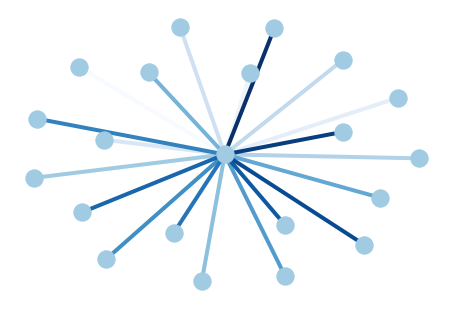

In [ ]:
from pyvis.network import Network

In [161]:
import networkx as nx
nx_graph = nx.Graph()

nx_graph.add_edges_from(np.unique(np.argwhere(sim_matrix(data[data[KEY_RUE]==street]) == 1.0), axis=0).tolist(), physics=False)
nt = Network("1000px", "1000px")
# populates the nodes and edges data structures
nt.from_nx(nx_graph)
nt.show("nx.html")

In [210]:
g = Network()
g.show_buttons(filter_=   ['configure','layout','interaction','physics','edges'])
g.add_node(0,image ="https://www.w3schools.com/w3css/img_lights.jpg")
g.add_node(1)
g.add_node(2, shape='image', image =f"images_MHL/96795.jpg")
g.add_node(3)
g.add_node(4)
g.add_node(5)
g.add_edge(0, 1)
g.show("basic.html")